# **Unsupervised Learning: Principal Component Analysis (Iris dataset)**
* sklearn doc: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

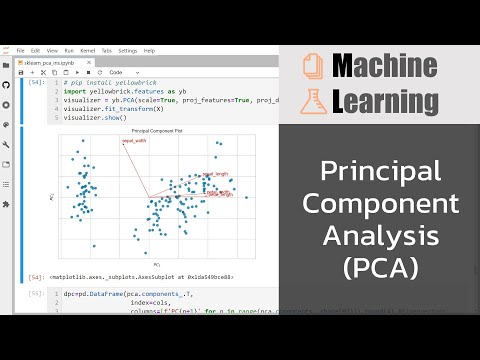

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('z8APHNo1iA4', width=720, height=405)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.1.5
numpy   version = 1.19.5
seaborn version = 0.11.1


In [5]:
pd.Timestamp.now()

Timestamp('2021-05-17 07:22:56.698007')

In [6]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/iris.csv')
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
137,6.4,3.1,5.5,1.8,virginica
128,6.4,2.8,5.6,2.1,virginica
118,7.7,2.6,6.9,2.3,virginica
83,6.0,2.7,5.1,1.6,versicolor
129,7.2,3.0,5.8,1.6,virginica
70,5.9,3.2,4.8,1.8,versicolor
21,5.1,3.7,1.5,0.4,setosa
131,7.9,3.8,6.4,2.0,virginica
101,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica


In [7]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [8]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
cols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

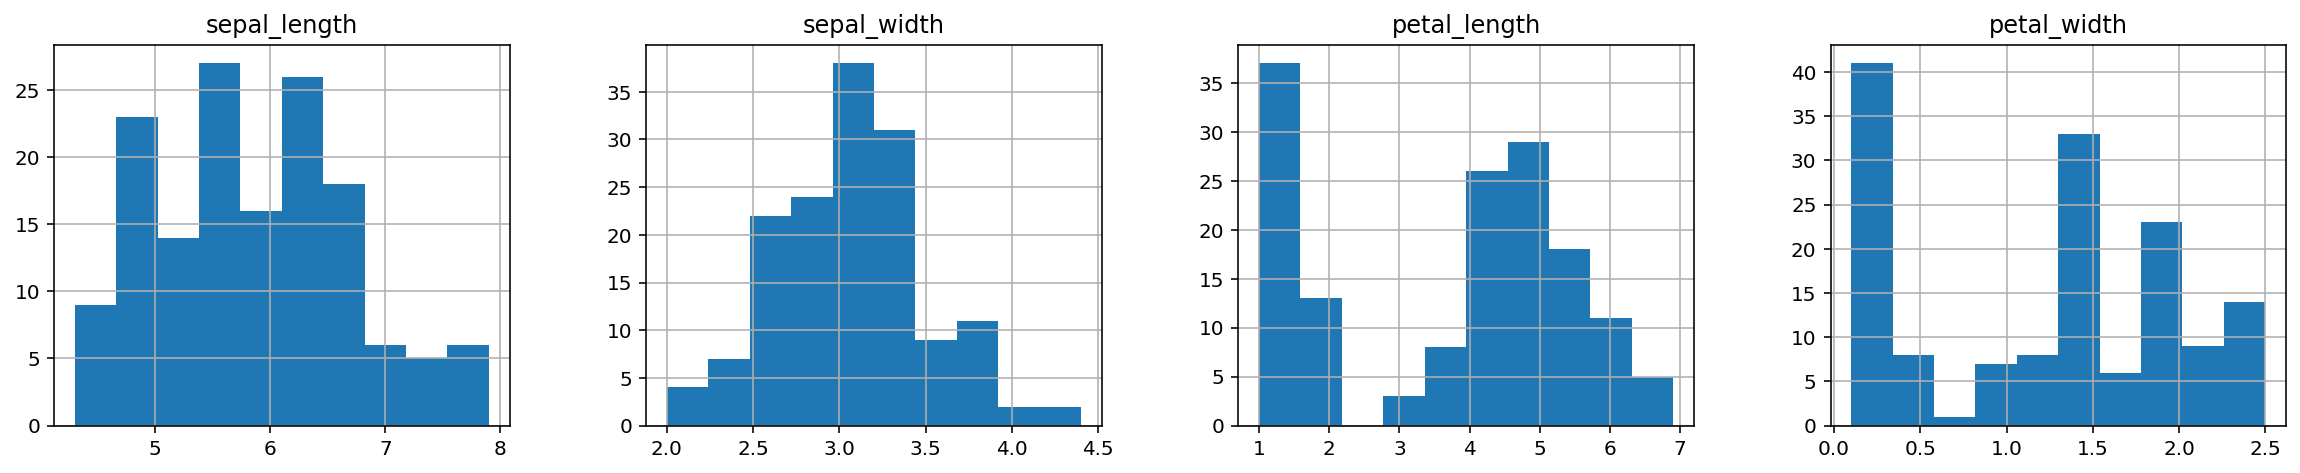

In [10]:
df[cols].hist(layout=(1, len(cols)), figsize=(5 * len(cols), 3.5));

In [11]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


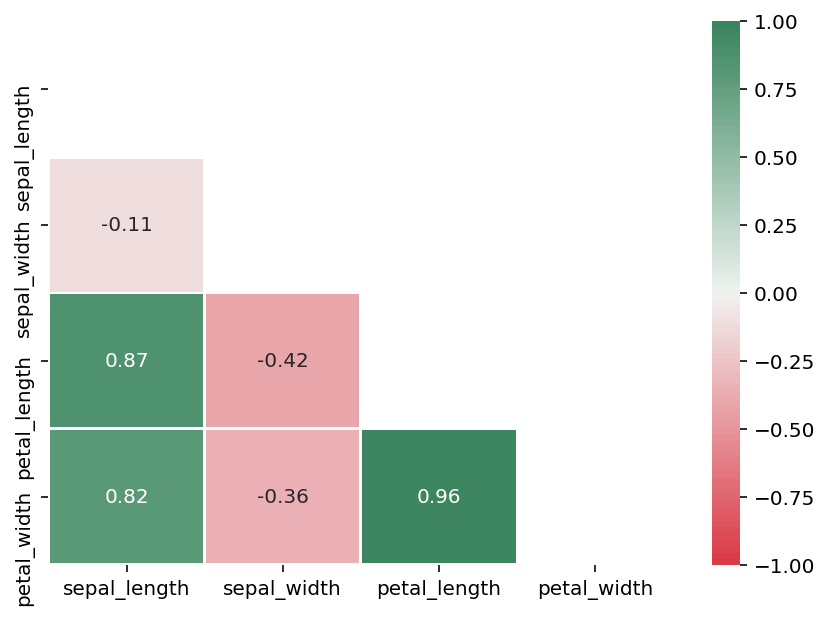

In [12]:
dcorr=df[cols].corr()
# dcorr

mask = np.zeros_like(dcorr)
# mask.shape
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(7,5)) 
sns.heatmap(dcorr, cmap=sns.diverging_palette(10, 145, n=100), 
            vmin=-1, vmax=1, center=0, linewidths=1, annot=True, mask=mask, ax=ax);

ValueError: ignored

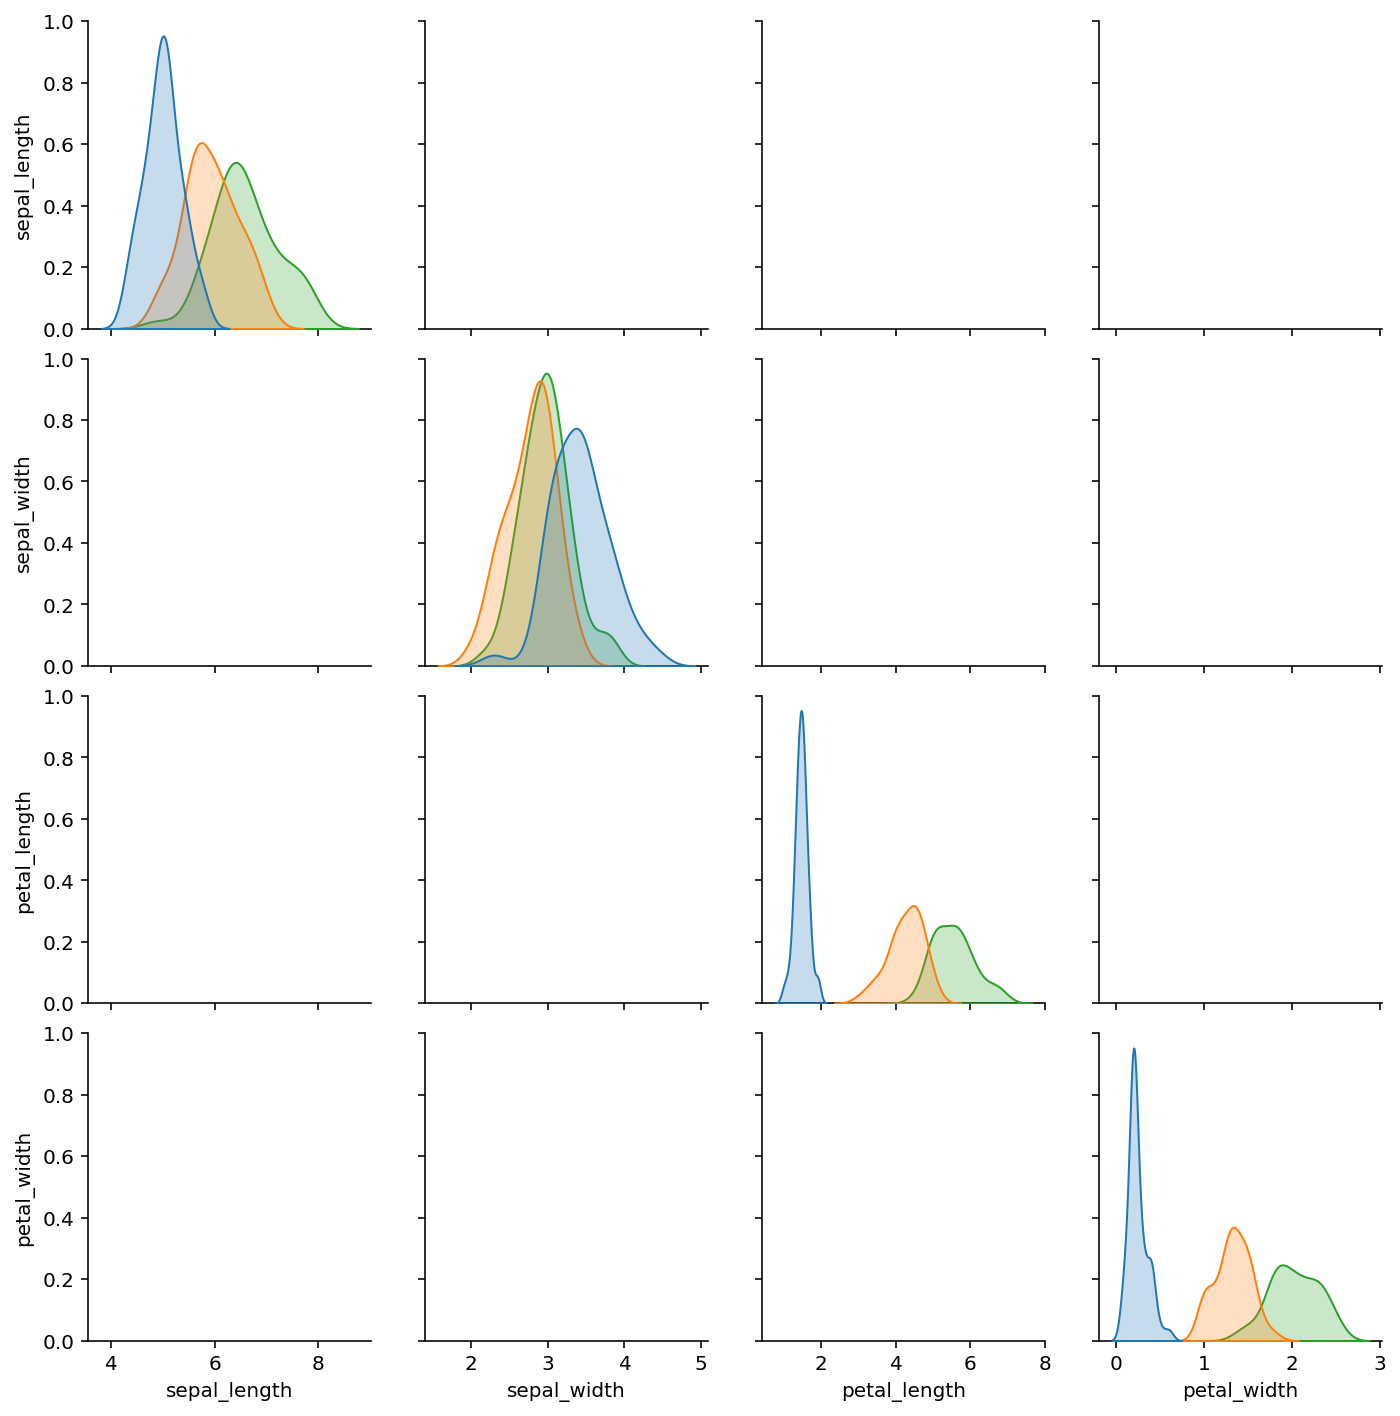

In [13]:
sns.pairplot(df, vars=cols, 
             hue='species', 
             markers=['o', 'D', '+'],
             plot_kws={'alpha': .4});

## **PCA**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # z-score

In [ ]:
df[cols]

# StandardScaler (z-score)
$z=\frac{x_i-\bar{x}}{sd}$

In [ ]:
X=df[cols]
scaler = StandardScaler()
X_t=scaler.fit_transform(X)

In [ ]:
scaler.mean_

In [ ]:
df[cols].mean()

In [ ]:
scaler.var_

In [ ]:
np.sqrt(scaler.var_)

In [ ]:
X_t[:5].round(4)

In [ ]:
dz=pd.DataFrame(X_t.round(4), columns=[f'z_{c}' for c in cols])
dz

In [ ]:
pd.concat([df, dz], axis='columns')

In [ ]:
(df['sepal_length']-scaler.mean_[0])/np.sqrt(scaler.var_[0])

In [ ]:
X_t[:, 0]

In [ ]:
X_t[:, 0].mean().round(4)

In [ ]:
np.sqrt(X_t[:, 0].var())

In [ ]:
X.head()

In [ ]:
X_t[:5]

In [ ]:
X_t.shape

In [ ]:
X_t.shape[1]

In [ ]:
pca = PCA(n_components=X_t.shape[1])
# pca = PCA(n_components=2)

pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}') # Eigenvalues
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')


In [ ]:
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(10, 7)):
    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    X_t=scaler.fit_transform(X)

    max_components = min(X.shape)
    x=np.arange(1, n_components+1)
    pca = PCA(n_components=max_components)
    pca.fit_transform(X_t)
    y1=pca.explained_variance_ratio_[:n_components]
    y2=np.cumsum(pca.explained_variance_ratio_)[:n_components]
    
    plt.figure(figsize=figsize)
    
    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        plt.plot(x, y2, linestyle='--', marker=marker, label='cumulative', color='salmon')
        
    plt.plot(x, y1, linestyle='-', marker=marker, label='individual', color='deepskyblue')
    plt.title('explained variance ratio')
    plt.xlabel('# of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()
    if with_cumulative:
        [plt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']), 
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
                plt.text(n+.02, v+.02, f'{v*100:.2f}%', fontsize=10)
                if with_cumulative:
                    plt.text(n+.02, cv+.02, f'{cv*100:.2f}%', fontsize=10)


In [ ]:
scree_plot(X, 4, True, True)

In [ ]:
scree_plot(X, 4, False, True, (20, 7))

In [ ]:
pca.components_ # Eigenvectors

In [ ]:
dpc=pd.DataFrame(pca.components_.T, 
                  index=cols,
                  columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4) #Eigenvectors
# dpc
dpc.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) > .5 else 'background-color: white')

In [ ]:
sns.heatmap(dpc, cmap=sns.diverging_palette(10, 145, n=100), linewidths=1, 
            center=0, annot=True, vmin=-1, vmax=1)

In [ ]:
X_t[:5]

In [ ]:
X_t.shape

In [ ]:
pca.components_.T.shape

In [ ]:
# multiply matrix
np.dot(X_t, pca.components_.T)[:5] # equals pca.transform(X_t)

In [ ]:
pca.transform(X_t)[:5]

In [ ]:
df.head()

In [ ]:
X_t[:1]

In [ ]:
pca.components_[:1]

In [ ]:
np.sum(X_t[:1] * pca.components_[:1])


In [ ]:
pca.n_components_

In [ ]:
df[:5]

In [ ]:
dd=pd.concat([pd.DataFrame(pca.transform(X_t), 
                           columns=[f'PC{n}' for n in range(1, pca.n_components_ + 1)]), 
              df[['species']]], axis = 'columns')
dd.head()

## **Plot PC1 and PC2**

In [ ]:
# pca = PCA(n_components=X.shape[1])
pca = PCA(n_components=2)

X_pca=pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}')
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

In [ ]:
X_pca.shape

In [ ]:
X_pca[:5]

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=.5, cmap='Set1', c=df.species.astype('category').cat.codes)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2');

## **biplot using yellowbrick package**

In [ ]:
# pip install yellowbrick
import yellowbrick.features as yb
visualizer = yb.PCA(scale=True, proj_features=True, proj_dim=2)
visualizer.fit_transform(X)
visualizer.show()

In [ ]:
dpc=pd.DataFrame(pca.components_.T, 
                  index=cols,
                  columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4) #Eigenvectors
# dpc
dpc.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) > .5 else 'background-color: white')

In [ ]:
df.corr()

## **Plot 3D (PC1, PC2, PC3)**

In [ ]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# pca = PCA(n_components=X.shape[1])
pca = PCA(n_components=3)

X_pca=pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}')
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

In [ ]:
X_pca[:5]

In [ ]:
# switch to interactive matplotlib
%matplotlib qt
%pylab qt

In [ ]:
# switch back to inline mode
%matplotlib inline

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=.5, cmap='Set1', c=df.species.astype('category').cat.codes)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3');
